### 一、获取与处理数据

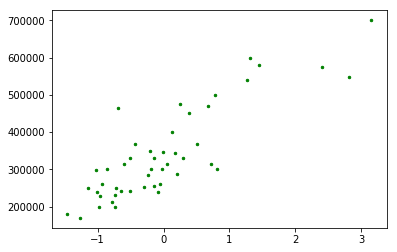

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 输入数据
x, y = [], []

# 按行读取文件，r为读取操作
for sample in open("../../MachineLearning/_Data/prices.txt", 'r'):
    _x, _y = sample.split(',') # 以逗号分隔
    x.append(float(_x)) # 转换为浮点数
    y.append(float(_y))

# 转为ndarray格式，方便向量运算
# 数据个数确定，不需要增删，且需要随机读取，用数组格式储存合理！
x, y = np.array(x), np.array(y)

# 通常对输入数据进行标准化，x为房子面积（自变量），y为房子价格
x = (x - x.mean()) / x.std()

# 画散点图
plt.figure()
plt.scatter(x, y, c='g', s=6)
plt.show()

### 二、选择与训练模型

观察图像，决定使用线性回归中的多项式拟合。

In [15]:
# 在（-2，4）区间均匀取100个点
x0 = np.linspace(-2, 4, 100)

# 多项式回归模型
# deg参数代表模型参数中的n，即多项式的次数
# 返回的模型能够通过输入的x，输出相应预测的y
def get_model(deg):
    return lambda input_x=x0 : np.polyval(np.polyfit(x, y, deg), input_x)

In [18]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is